classification for job:- 
accuracy:-  1.0
precission:-  1.0
recall:-  1.0
f1_score:-  1.0
confusion_matrix:- [[32  0]
 [ 0 18]]
regression for cgpa:-
MAE:-  0.17
R2 score:-  0.79


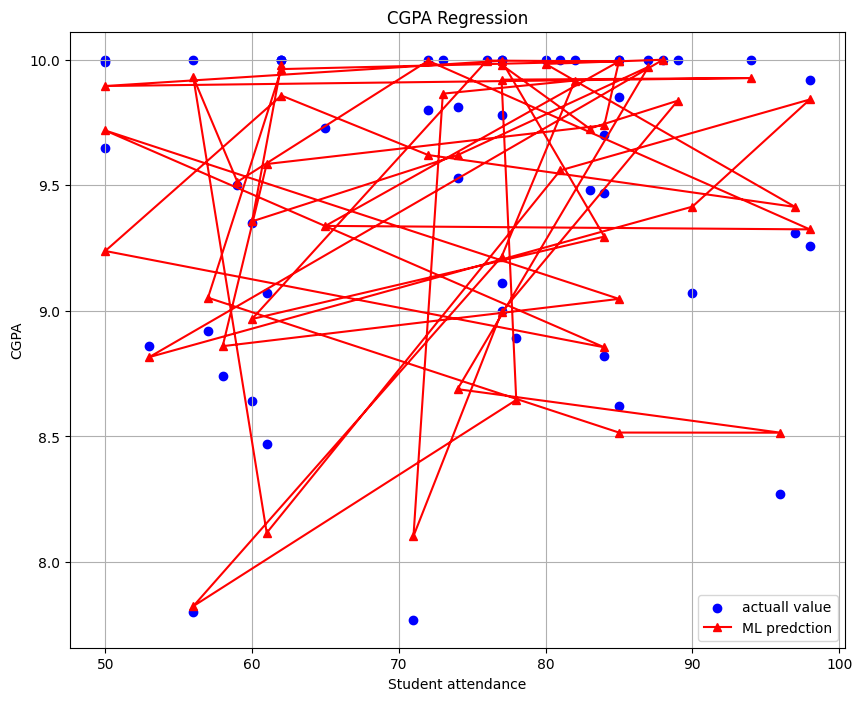

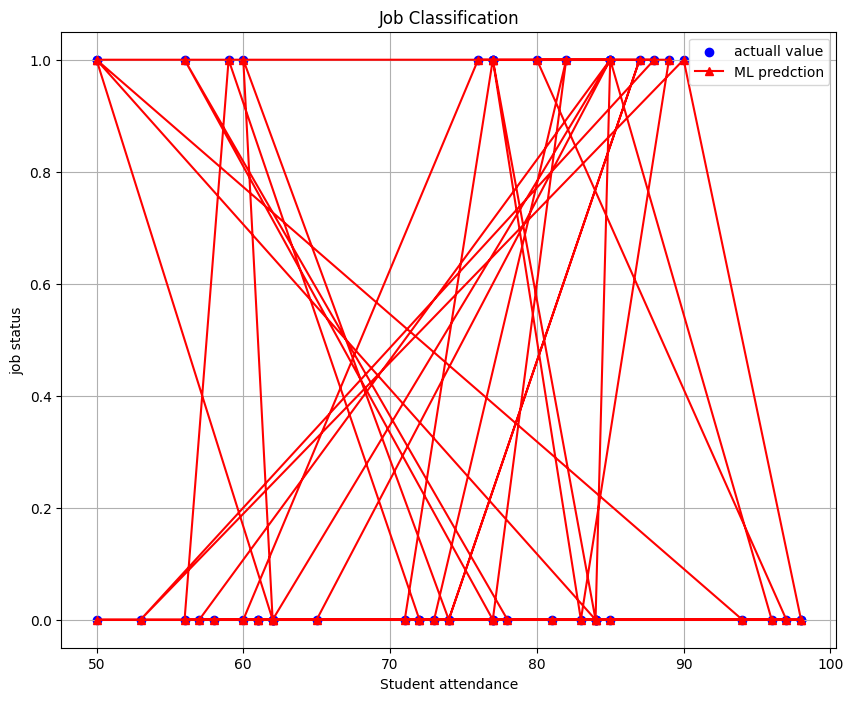

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score,mean_absolute_error,r2_score

import matplotlib.pyplot as plt

## pre processing:-
data = pd.read_csv("student_performance_job.csv")
# print(data.head(3))
# print(data.shape)
# print(data.columns)
# print(data.isnull().sum())

x = data[["Age","StudyHoursPerWeek","AttendanceRate","Internships","ProjectsDone","TechnicalSkills","SoftSkills","Extracurricular"]]
x = pd.get_dummies(x,columns=["Extracurricular"],drop_first=True)

y_job = LabelEncoder().fit_transform(data["JobPlacement"])
y_cgpa = data["CGPA"]


## split dataset:-
x_train_cgpa, x_test_cgpa, y_cgpa_train,y_cgpa_test = train_test_split(x,y_cgpa,test_size=0.2, random_state=42)
x_train_job,x_test_job,y_job_train,y_job_test = train_test_split(x,y_job,test_size=0.2,random_state=42)

## model selection:-
# model_cgpa = DecisionTreeRegressor(max_depth=3,random_state=42)
model_cgpa = RandomForestRegressor(n_estimators=100, random_state=42)
model_job = DecisionTreeClassifier(max_depth=3,random_state=42)

## train the model:-
model_job.fit(x_train_job,y_job_train)
model_cgpa.fit(x_train_cgpa,y_cgpa_train)

## predict:-
predict_job = model_job.predict(x_test_job)
predict_cgpa = model_cgpa.predict(x_test_cgpa)

print("classification for job:- ")
print("accuracy:- ",accuracy_score(y_job_test,predict_job))
print("precission:- ",precision_score(y_job_test,predict_job))
print("recall:- ",recall_score(y_job_test,predict_job))
print("f1_score:- ",f1_score(y_job_test,predict_job))
print("confusion_matrix:-",confusion_matrix(y_job_test,predict_job))

print("regression for cgpa:-")
print("MAE:- ",round(mean_absolute_error(y_cgpa_test,predict_cgpa),2))
print("R2 score:- ",round(r2_score(y_cgpa_test,predict_cgpa),2))

plt.figure(figsize=(10,8))
plt.scatter(x_test_cgpa["AttendanceRate"],y_cgpa_test,color="blue",marker="o",label = "actuall value")
plt.plot(x_test_cgpa["AttendanceRate"],predict_cgpa,marker="^",color="red",label = "ML predction")
plt.title("CGPA Regression")
plt.xlabel("Student attendance")
plt.ylabel("CGPA")
plt.grid()
plt.legend()

plt.show()


plt.figure(figsize=(10,8))
plt.scatter(x_test_job["AttendanceRate"],y_job_test,color="blue",marker="o",label = "actuall value")
plt.plot(x_test_job["AttendanceRate"],predict_job,marker="^",color="red",label = "ML predction")
plt.title("Job Classification")
plt.xlabel("Student attendance")
plt.ylabel("job status")
plt.grid()
plt.legend()

plt.show()

